# Brent correlation with energy sector stocks.

This model is still in development and made for educational purposes. It should not be taken as a decision rule or advice at all.

In this script I start with simple data modelling for Brent correlation with stocks from energy sector. This model can also be modified to fit for other companies and commodities such as gold, wheat and soybean.

For now the model analyzes price correlation split on deciles and we can see it varies for different oil price ranges. 
Things on development: 

-Data accuracy test (since yahoo finance is useful to start with but sometimes unreliable for a final version). 
-Different group analysis with machine learning methods. 
-Better plots and graphical understanding.

Any sugestion is welcomed.

In [2]:
import pandas as pd, yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
tickers = ['BZ=F','XOM', 'FRO', 'YPF', 'BP', 'COP', 'CVX', 'EOG', 'SLB', 'WMB']
df = yf.download(tickers, start='2015-01-01', end='2021-04-15')
df = df['Adj Close']
df = df[['BZ=F','XOM', 'FRO', 'YPF', 'BP', 'COP', 'CVX', 'EOG', 'SLB', 'WMB']]

[*********************100%***********************]  10 of 10 completed


In [6]:
df

,BZ=F,XOM,FRO,YPF,BP,COP,CVX,EOG,SLB,WMB
Date,,,,,,,,,,
2015-01-02,56.419998,68.678993,8.528535,25.267620,24.997982,56.847458,84.587646,84.866158,69.699425,30.521172
2015-01-05,53.110001,66.799820,8.698426,23.961174,23.673321,54.142014,81.206558,79.750648,67.811943,29.313015
2015-01-06,51.099998,66.444687,10.737121,23.883757,23.496269,51.906727,81.168976,77.478096,66.485786,28.914797
2015-01-07,51.150002,67.117950,11.416683,23.564404,23.555281,52.253147,81.101357,76.990463,66.477654,28.759560
2015-01-08,50.959999,68.235092,12.775813,24.145046,24.086456,53.556377,82.957199,79.934639,67.283104,29.036289
...,...,...,...,...,...,...,...,...,...,...
2021-04-08,63.200001,55.195908,7.590000,4.180000,24.429230,50.844360,101.774200,71.787758,27.059999,23.680000
2021-04-09,62.950001,55.067772,7.370000,4.020000,24.103111,50.834438,101.675407,71.370094,26.760000,23.600000
2021-04-12,63.279999,54.703087,6.770000,3.920000,24.330408,50.467297,100.549194,69.709396,26.540001,23.450001


In [7]:
covarianzas = df.cov()
corrPearson = df.corr(method='pearson')
corrSpearman = df.corr(method='spearman')
corrKendall = df.corr(method='kendall')
corrPearson

,BZ=F,XOM,FRO,YPF,BP,COP,CVX,EOG,SLB,WMB
BZ=F,1.000000,0.547242,-0.300589,0.256097,0.852304,0.884819,0.768204,0.763274,0.193308,0.404101
XOM,0.547242,1.000000,-0.248060,0.716473,0.617473,0.474107,0.412983,0.855169,0.766742,0.285971
FRO,-0.300589,-0.248060,1.000000,-0.101548,-0.342970,-0.080148,-0.427412,-0.446676,-0.081559,0.296773
YPF,0.256097,0.716473,-0.101548,1.000000,0.239321,0.155584,-0.067302,0.629997,0.891960,0.551444
BP,0.852304,0.617473,-0.342970,0.239321,1.000000,0.864409,0.861009,0.761110,0.131568,0.208446
COP,0.884819,0.474107,-0.080148,0.155584,0.864409,1.000000,0.739224,0.676977,0.075826,0.381780
CVX,0.768204,0.412983,-0.427412,-0.067302,0.861009,0.739224,1.000000,0.562559,-0.148428,-0.014078
EOG,0.763274,0.855169,-0.446676,0.629997,0.761110,0.676977,0.562559,1.000000,0.650812,0.356115
SLB,0.193308,0.766742,-0.081559,0.891960,0.131568,0.075826,-0.148428,0.650812,1.000000,0.437893
WMB,0.404101,0.285971,0.296773,0.551444,0.208446,0.381780,-0.014078,0.356115,0.437893,1.000000


In [8]:
corrSpearman

,BZ=F,XOM,FRO,YPF,BP,COP,CVX,EOG,SLB,WMB
BZ=F,1.000000,0.457358,-0.335090,0.170332,0.872324,0.889038,0.786066,0.711351,0.083064,0.447772
XOM,0.457358,1.000000,-0.464042,0.497970,0.557861,0.348109,0.394977,0.771618,0.596690,0.322792
FRO,-0.335090,-0.464042,1.000000,-0.201971,-0.415737,-0.129487,-0.427653,-0.633259,-0.080445,0.023254
YPF,0.170332,0.497970,-0.201971,1.000000,0.186415,0.082148,-0.133989,0.524387,0.826777,0.565752
BP,0.872324,0.557861,-0.415737,0.186415,1.000000,0.852256,0.848389,0.749725,0.076313,0.351759
COP,0.889038,0.348109,-0.129487,0.082148,0.852256,1.000000,0.733815,0.616724,0.019812,0.430061
CVX,0.786066,0.394977,-0.427653,-0.133989,0.848389,0.733815,1.000000,0.545774,-0.228648,0.119133
EOG,0.711351,0.771618,-0.633259,0.524387,0.749725,0.616724,0.545774,1.000000,0.499792,0.485010
SLB,0.083064,0.596690,-0.080445,0.826777,0.076313,0.019812,-0.228648,0.499792,1.000000,0.483523
WMB,0.447772,0.322792,0.023254,0.565752,0.351759,0.430061,0.119133,0.485010,0.483523,1.000000


<AxesSubplot:>

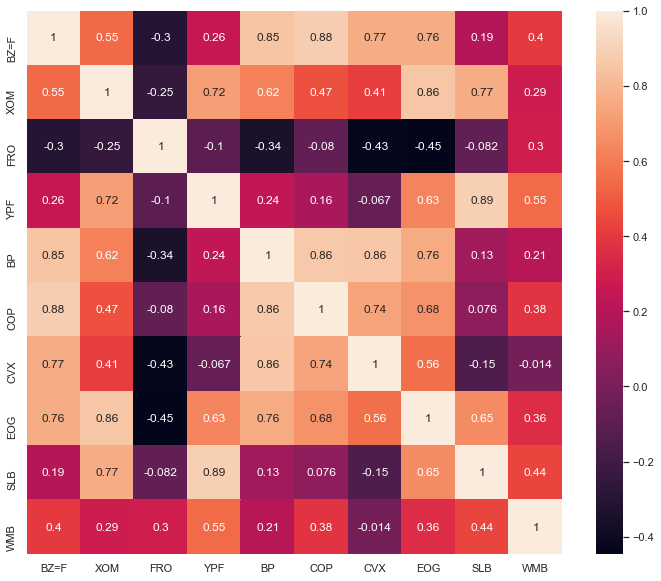

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(corrPearson, annot=True)

<AxesSubplot:>

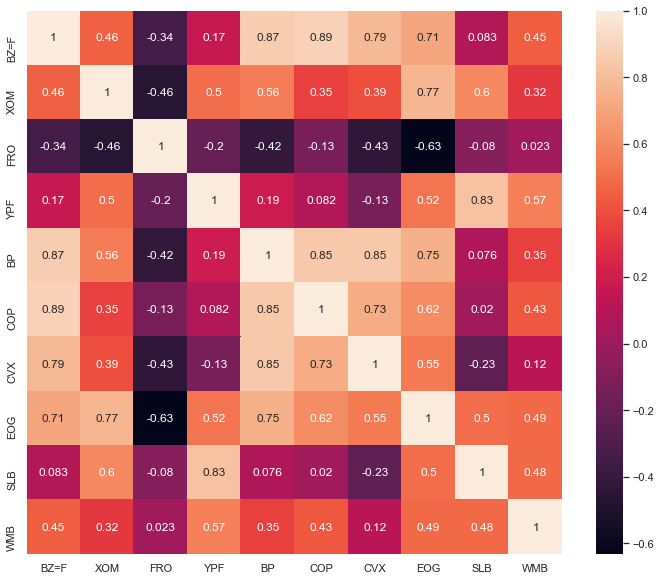

In [10]:
plt.figure(figsize=(12, 10))

sns.heatmap(corrSpearman, annot=True)

In [12]:
df['crude_deciles'] = pd.qcut(df['BZ=F'], 10, labels = False)
df['crude_deciles'] += 1

In [13]:
cov_dcl = df.groupby(df['crude_deciles']).cov()
corr_pear_dcl =df.groupby(df['crude_deciles']).corr(method='pearson').round(2)
corr_spea_dcl =df.groupby(df['crude_deciles']).corr(method='spearman').round(2)
corr_kenda_dcl =df.groupby(df['crude_deciles']).corr(method='kendall').round(2)


In [14]:
corr_pear_dcl

BZ=F   XOM   FRO   YPF    BP   COP   CVX   EOG   SLB   WMB
crude_deciles                                                                 
1.0           BZ=F  1.00  0.38 -0.13  0.44 -0.01  0.32  0.08  0.46  0.41  0.20
              XOM   0.38  1.00  0.03  0.97  0.31  0.19 -0.22  0.96  0.97 -0.39
              FRO  -0.13  0.03  1.00  0.02  0.36  0.52  0.12  0.14  0.04  0.53
              YPF   0.44  0.97  0.02  1.00  0.17  0.06 -0.39  0.92  0.99 -0.42
              BP   -0.01  0.31  0.36  0.17  1.00  0.56  0.55  0.37  0.14  0.10
...                  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
10.0          COP   0.70  0.70 -0.16 -0.37  0.27  1.00 -0.00  0.68  0.18  0.33
              CVX   0.12  0.17 -0.17  0.32  0.75 -0.00  1.00  0.39  0.40  0.13
              EOG   0.52  0.37 -0.62  0.06  0.38  0.68  0.39  1.00  0.75  0.14
              SLB   0.19 -0.15 -0.90  0.55  0.19  0.18  0.40  0.75  1.00 -0.18
              WMB  -0.14  0.30  0.10 -0.50  0.05  0.33  0.13  0.14 -0.18  1.00

[100 rows x 10 columns]

In [15]:
corr_pear_dcl

BZ=F   XOM   FRO   YPF    BP   COP   CVX   EOG   SLB   WMB
crude_deciles                                                                 
1.0           BZ=F  1.00  0.38 -0.13  0.44 -0.01  0.32  0.08  0.46  0.41  0.20
              XOM   0.38  1.00  0.03  0.97  0.31  0.19 -0.22  0.96  0.97 -0.39
              FRO  -0.13  0.03  1.00  0.02  0.36  0.52  0.12  0.14  0.04  0.53
              YPF   0.44  0.97  0.02  1.00  0.17  0.06 -0.39  0.92  0.99 -0.42
              BP   -0.01  0.31  0.36  0.17  1.00  0.56  0.55  0.37  0.14  0.10
...                  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
10.0          COP   0.70  0.70 -0.16 -0.37  0.27  1.00 -0.00  0.68  0.18  0.33
              CVX   0.12  0.17 -0.17  0.32  0.75 -0.00  1.00  0.39  0.40  0.13
              EOG   0.52  0.37 -0.62  0.06  0.38  0.68  0.39  1.00  0.75  0.14
              SLB   0.19 -0.15 -0.90  0.55  0.19  0.18  0.40  0.75  1.00 -0.18
              WMB  -0.14  0.30  0.10 -0.50  0.05  0.33  0.13  0.14 -0.18  1.00

[100 rows x 10 columns]

In [16]:
corr_pear_dcl.reset_index(inplace=True)

In [18]:
corr_pear_dcl['Assets_by_dcls'] = corr_pear_dcl["crude_deciles"].astype(str) + corr_pear_dcl["level_1"]

In [19]:
#00FF69
#27E3D3
#37AFFA
#2744E3
#5507FA
#0DFB39
#0BE39B
#00D8FA
#0B66E3
#2924FF

<AxesSubplot:xlabel='Assets_by_dcls'>

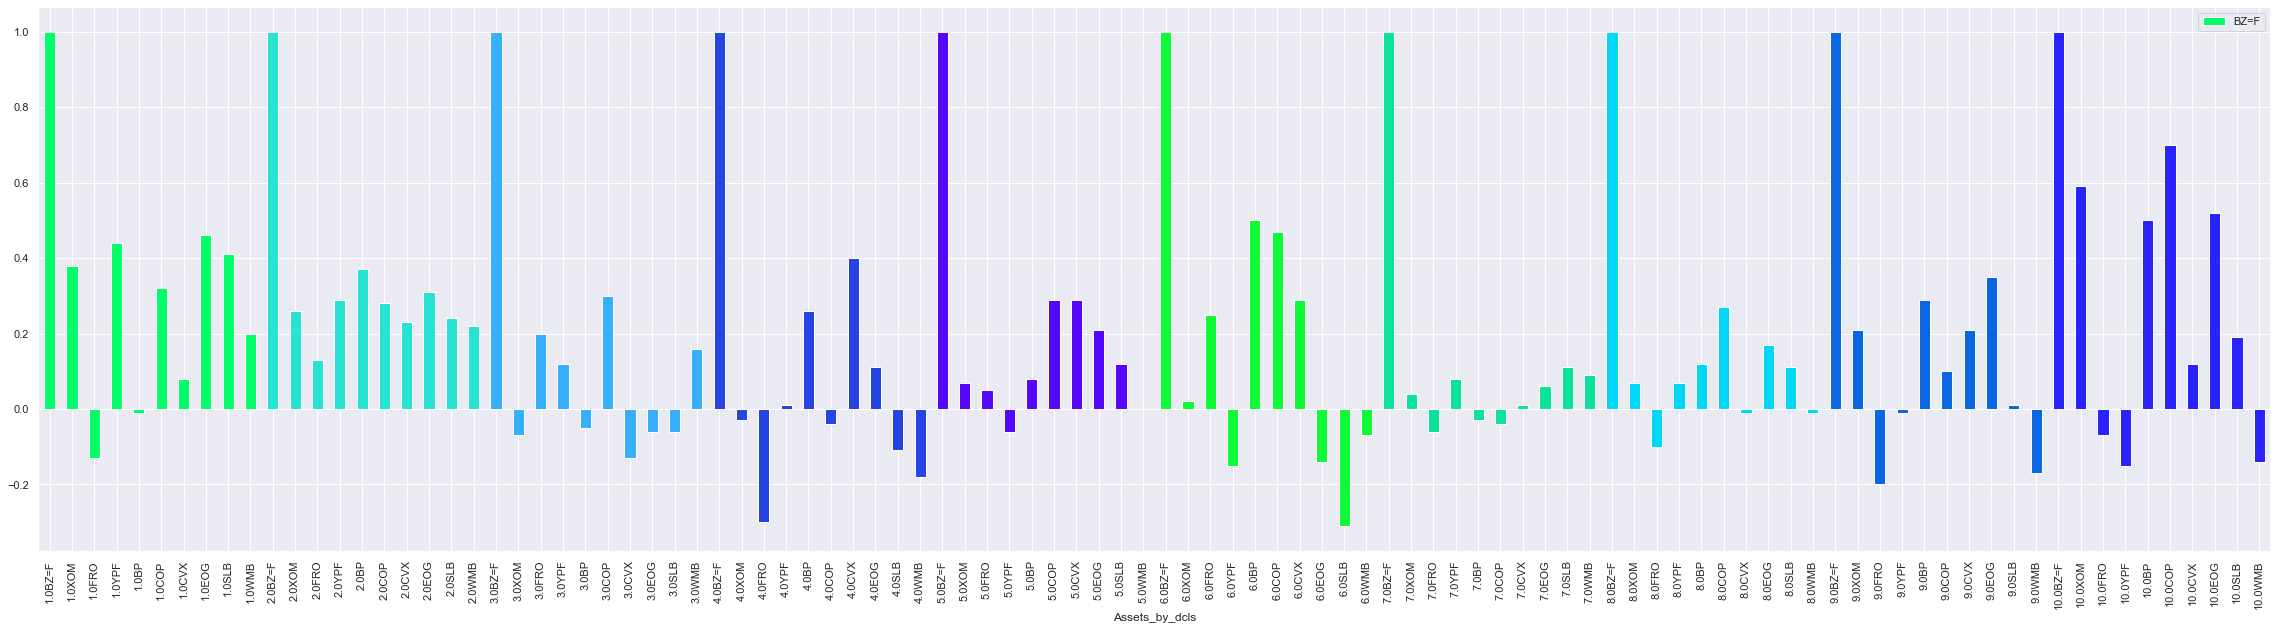

In [22]:
colors = {1: '#00FF69', 2: '#27E3D3', 3: '#37AFFA',4:'#2744E3',5:'#5507FA', 6:'#0DFB39', 7:'#0BE39B', 8:'#00D8FA', 9:'#0B66E3', 10:'#2924FF'}
corr_pear_dcl.plot.bar(x='Assets_by_dcls', y='BZ=F',figsize=(40, 10), color=[colors[i] for i in corr_pear_dcl['crude_deciles']])